In [1]:
from google.colab import drive
drive.mount("/content/MyDrive/")

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


#DESCRIPTION

**Problem Statement**

  Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 

  The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.

  You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

Project Task: Week 1

Class Imbalance Problem:

  Perform an EDA on the dataset.

  See what a positive, negative, and neutral review looks like

  Check the class count for each class. It’s a class imbalance problem.

  Convert the reviews in Tf-Idf score.

  Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.


In [3]:
train = pd.read_csv('/content/MyDrive/MyDrive/AI Capstone Proj 1/Project 1-Ecommerce-Datasets/Ecommerce/train_data.csv')
test = pd.read_csv('/content/MyDrive/MyDrive/AI Capstone Proj 1/Project 1-Ecommerce-Datasets/Ecommerce/test_data.csv')
test_hidden = pd.read_csv('/content/MyDrive/MyDrive/AI Capstone Proj 1/Project 1-Ecommerce-Datasets/Ecommerce/test_data_hidden.csv')

In [4]:
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [5]:
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [6]:
train.shape

(4000, 8)

In [7]:
# Keep the Features that we need for further exploring.
df1 = train[['reviews.text','sentiment']]

In [8]:
df1.head()

,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


In [9]:
df1.index = pd.Series(list(range(df1.shape[0])))

In [10]:
print(df1.shape)
df1.head()

(4000, 2)


,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


Preprocessing 

In [11]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('all')
wl = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [12]:
def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wl.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [13]:
df1['Preprocessed_Reviews'] = df1['reviews.text'].apply(preprocess)
df1.head()

,reviews.text,sentiment,Preprocessed_Reviews
0,Purchased on Black FridayPros - Great Price (e...,Positive,purchase black fridaypros great price even sal...
1,I purchased two Amazon in Echo Plus and two do...,Positive,purchase two amazon echo plus two dot plus fou...
2,Just an average Alexa option. Does show a few ...,Neutral,average alexa option show thing screen still l...
3,"very good product. Exactly what I wanted, and ...",Positive,good product exactly want good price
4,This is the 3rd one I've purchased. I've bough...,Positive,rd one purchase buy one niece case compare one...


In [14]:
df2  = df1[['sentiment','Preprocessed_Reviews']]
df2.head()

,sentiment,Preprocessed_Reviews
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


Creating TF-IDF Matrix & Multinomial Naive Bayes Classifier

In [15]:
def textprocess(data):
  import string
  remove_punc = [char for char in data if char not in string.punctuation] #Remove Punctuation Logic
  sent_wout_punc = ''.join(remove_punc) # Join Characters to form sentences
  w = sent_wout_punc.split()
  from nltk.corpus import stopwords
  rem_stopwords = [word for word in w if word.lower() not in stopwords.words('english')]
  return rem_stopwords

In [16]:
df2.groupby('sentiment').describe()

Preprocessed_Reviews         \
                         count unique   
sentiment                               
Negative                    93     78   
Neutral                    158    145   
Positive                  3749   3372   

                                                                   
                                                         top freq  
sentiment                                                          
Negative   last model kindle hdx terrible purchase model ...    3  
Neutral    average alexa option show thing screen still l...    2  
Positive   buy kindle yr old granddaughter christmas husb...    4

In [17]:
df2['Preprocessed_Reviews'].head().apply(textprocess)

0    [purchase, black, fridaypros, great, price, ev...
1    [purchase, two, amazon, echo, plus, two, dot, ...
2    [average, alexa, option, show, thing, screen, ...
3          [good, product, exactly, want, good, price]
4    [rd, one, purchase, buy, one, niece, case, com...
Name: Preprocessed_Reviews, dtype: object

Sklearn Package CountVectorizer (For creating Bag of Words)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(analyzer=textprocess).fit(df2['Preprocessed_Reviews'])

In [19]:
len(bag_of_words.vocabulary_)

3407

In [20]:
review_bo_words = bag_of_words.transform(df2['Preprocessed_Reviews'])

Tf-Idf

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
tfidf_data = TfidfTransformer().fit(review_bo_words)
tfidf_final_data = tfidf_data.transform(review_bo_words)

In [23]:
tfidf_final_data.shape

(4000, 3407)

The data is all set for Model Building!

  

*   Model Training - NaiveBayes Algorithm
*   String Data Handling - MultinomialNB



In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidf_final_data,df2['sentiment'])

In [25]:
model

MultinomialNB()

In [26]:
df2['Preprocessed_Reviews'][9]

'cheap run chrome stuff return store'

In [27]:
inputData = "cheap run chrome stuff return store"
l1 = textprocess(inputData)
l2 = bag_of_words.transform(l1)
l3 = tfidf_data.transform(l2)
prediction = model.predict(l3[0])
prediction

array(['Positive'], dtype='<U8')



*Insight*

After running Multinomial Naive Bayes Classifier Everything is classified as positive because of the class imbalance as seen above.

Tackling Class Imbalance Problem:


In [28]:
df2.columns

Index(['sentiment', 'Preprocessed_Reviews'], dtype='object')

In [29]:
X = df2.drop('sentiment',axis=1)
Y = df2['sentiment']

In [30]:
print(X.shape,Y.shape)

(4000, 1) (4000,)


In [31]:
Y.value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

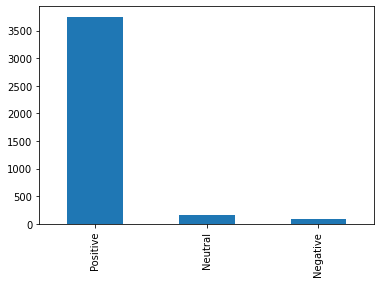

In [32]:
Y.value_counts().plot(kind='bar')

Applying Over Sampling

In [33]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=0) 
X_over,Y_over=rs.fit_resample(X,Y)

In [34]:
Y_over.value_counts()

Positive    3749
Neutral     3749
Negative    3749
Name: sentiment, dtype: int64

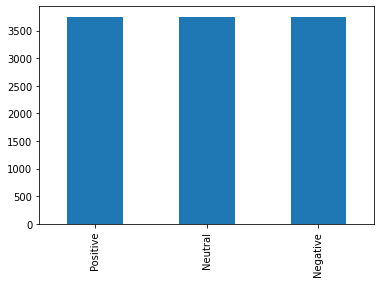

In [35]:
Y_over.value_counts().plot(kind='bar')

In [36]:
print(X_over.shape,Y_over.shape)

(11247, 1) (11247,)


In [37]:
X_over.head()

,Preprocessed_Reviews
0,purchase black fridaypros great price even sal...
1,purchase two amazon echo plus two dot plus fou...
2,average alexa option show thing screen still l...
3,good product exactly want good price
4,rd one purchase buy one niece case compare one...


In [38]:
Y_over.head()

0    Positive
1    Positive
2     Neutral
3    Positive
4    Positive
Name: sentiment, dtype: object

In [39]:
data = pd.concat([X_over,Y_over],axis=1)
data.head()

,Preprocessed_Reviews,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


In [40]:
data.isnull().sum()

Preprocessed_Reviews    0
sentiment               0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Preprocessed_Reviews  11247 non-null  object
 1   sentiment             11247 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


Train & Test Split Data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['Preprocessed_Reviews'],data['sentiment'],test_size=0.1)

In [43]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10122,) (1125,) (10122,) (1125,)




*Bag of Words*

  The aim of this project is to classify the reviews into positive, neutral and negative sentiment.

There are two main steps which are involved:

  We need to find word embedding to convert text into a numerical representation.

  We fit the numerical representations of text to machine learning algorithms or deep learning architectures.

*Text Preprocessing*

The following text preprocessing methods are implemented to convert raw reviews to cleaned review making it easier to do feature extraction in the next step.


1.   Remove non-character such as digits and symbols.
2.   Convert to lower case.
3.   Remove stop words such as "the" and "and" if needed.
4.   Convert to root words by stemming if needed.




    
    
    
    


In [44]:
from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [45]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 opinion model small feel cheap sd card slot




*CountVectorizer with Multinomial Naive Bayes (Benchmark Model)*

*   Now as we have cleaned all reviews the next step is converting the reviews into numerical representations for a machine learning algorithm.
*    We will use CountVectorizer which implements both tokenization and occurrence counting in a single class provided by the Sklearn library. The output is a sparse matrix representation of the document.



    

   



In [46]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
CVec = CountVectorizer() 
X_train_CVec = CVec.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(CVec.get_feature_names())) #6378 
print("Show some feature names : \n", CVec.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_CVec, Y_train)

Number of features : 3285 

Show some feature names : 
 ['abc', 'eve', 'orginal', 'trek']


MultinomialNB()

In [47]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

def metrics(preds):
  print("Accuracy on validation set: ",accuracy_score(Y_test,preds))
  print(classification_report(Y_test,preds))
  print(confusion_matrix(Y_test,preds))
  sns.heatmap(confusion_matrix(Y_test,preds),cmap="Greens",annot=True,fmt='d')

Accuracy on validation set:  0.9368888888888889
              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96       374
     Neutral       0.91      0.94      0.93       372
    Positive       0.94      0.91      0.92       379

    accuracy                           0.94      1125
   macro avg       0.94      0.94      0.94      1125
weighted avg       0.94      0.94      0.94      1125

[[358   9   7]
 [  5 350  17]
 [  9  24 346]]


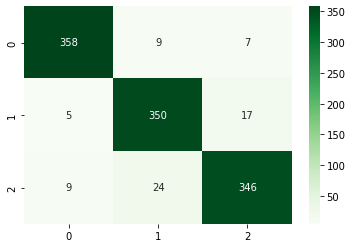

In [48]:
# Evaluate the model on validaton set
preds = mnb.predict(CVec.transform(X_test_cleaned))
metrics(preds)



*TfidfVectorizer with Logistic Regression*

*     Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.
*     In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.



  

  



In [49]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, Y_train)

Number of features : 1439 

Show some feature names : 
 ['ability', 'qc']


LogisticRegression()

Accuracy on validation set:  0.9777777777777777
              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99       374
     Neutral       0.95      1.00      0.97       372
    Positive       1.00      0.93      0.97       379

    accuracy                           0.98      1125
   macro avg       0.98      0.98      0.98      1125
weighted avg       0.98      0.98      0.98      1125

[[374   0   0]
 [  0 372   0]
 [  5  20 354]]


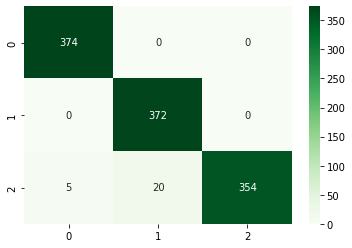

In [50]:
# Evaluating on the validaton set
predict = lr.predict(tfidf.transform(X_test_cleaned))
metrics(predict)



*TfidfVectorizer with Linear SVM by using SGD*

Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.


In [51]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# SVM
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_tfidf, Y_train)

Number of features : 1439 

Show some feature names : 
 ['ability', 'qc']


SGDClassifier()

Accuracy on validation set:  0.9831111111111112
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       374
     Neutral       0.96      1.00      0.98       372
    Positive       1.00      0.95      0.97       379

    accuracy                           0.98      1125
   macro avg       0.98      0.98      0.98      1125
weighted avg       0.98      0.98      0.98      1125

[[374   0   0]
 [  0 372   0]
 [  3  16 360]]


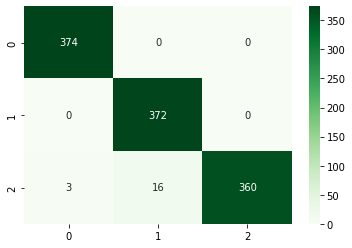

In [52]:
# Evaluating on the validaton set
predictions = clf.predict(tfidf.transform(X_test_cleaned))
metrics(predictions)



*Using XGBoost Classifier*

Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.


In [53]:
from xgboost import XGBClassifier
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, Y_train)

Number of features : 1439 

Show some feature names : 
 ['ability', 'qc']


XGBClassifier(objective='multi:softprob')

Accuracy on validation set:  0.9208888888888889
              precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       374
     Neutral       0.87      0.94      0.90       372
    Positive       0.94      0.84      0.88       379

    accuracy                           0.92      1125
   macro avg       0.92      0.92      0.92      1125
weighted avg       0.92      0.92      0.92      1125

[[369   5   0]
 [  0 350  22]
 [ 13  49 317]]


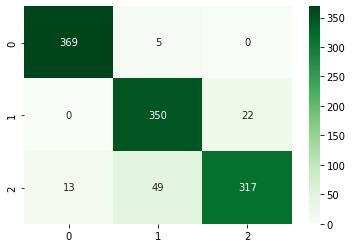

In [54]:
# Evaluating on the validaton set
predict_xg = xgb.predict(tfidf.transform(X_test_cleaned))
metrics(predict_xg)



*Pipeline and GridSearch*

We will build a pipeline in the Sklearn library to streamline the workflow and use GridSearch on the pipeline model to implement hyperparameter tuning for both the vectorizer and classifier at once.


The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}
Accuracy on validation set:  0.9982222222222222
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       374
     Neutral       0.99      1.00      1.00       372
    Positive       1.00      0.99      1.00       379

    accuracy                           1.00      1125
   macro avg       1.00      1.00      1.00      1125
weighted avg       1.00      1.00      1.00      1125

[[374   0   0]
 [  0 372   0]
 [  0   2 377]]


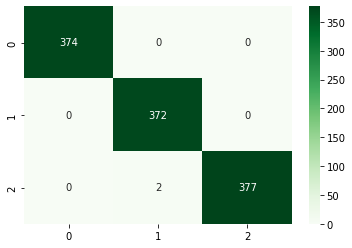

In [55]:
# Building a pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words 
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, Y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
pred = grid.predict(X_test_cleaned)
metrics(pred)



*Word2Vec*

Another common approach of word embedding is the prediction based embedding like Word2Vec model. Briefly, Word2Vec is a combination of two techniques: Continuous Bag of Words (CBoW) and Skip-Gram model. Both are Shallow Neural Networks which learn weights for the word vector representations.

Here, we will train Word2Vec model to create our own word vector representation using gensim library. Then we will fit the feature vectors of the reviews to the Random Forest Classifier. Here's the workflow of this part: -

*   Parse review text to sentences (Word2Vec model takes a list of sentences as inputs).
*   Create vocabulary list using Word2Vec model.

*   Transform each review into numerical representation by computing average feature vectors of words therein
*   
    Fit the average feature vectors to Random Forest Classifier





*Parsing Review into Sentences*

Word2Vec model takes a list of sentences as inputs and outputs word vector representations for words in the vocabulary list created. Before we train the Word2Vec model, we have to parse reviews in the training set into sentences.


In [56]:
# Splitting review text into parsed sentences using NLTK's punkt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

10122 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['opinion', 'model', 'small', 'feel', 'cheap', 'sd', 'card', 'slot']


In [57]:
from gensim.models import Word2Vec
w2v = Word2Vec()



*Creating Vocabulary List using Word2Vec Model*

As we have a set of cleaned and parsed sentences from the training data, we will train our own word vector representations by specifying the embedding dimension (= length of feature vector).


In [58]:
# Fitting parsed sentences to Word2Vec model 

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 1235 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['tablet', 'buy', 'use', 'good', 'get', 'amazon', 'great', 'work', 'one', 'kindle']




*Averaging Feature Vectors*

Now we have created a vocabulary list of words with each word having a word representation(ie. feature vector of dim 300).

To find a numerical representation for a review, we run through each word in a review text. For words appear in the vocabulary list, we compute the average feature vectors of all those words. The average feature vector is the numerical represenation of the review.


In [59]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the vocabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the vocabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [60]:
# Getting feature vectors for training set
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Getting feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 10122 feature vectors with 300 dimensions
Validation set : 1125 feature vectors with 300 dimensions


In [61]:
# Getting feature vectors for training set
trainVector = getAvgFeatureVecs(X_train, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)

# Getting feature vectors for validation set
testVector = getAvgFeatureVecs(X_test, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 10122 feature vectors with 300 dimensions
Validation set : 1125 feature vectors with 300 dimensions


Accuracy on validation set:  0.9955555555555555
              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99       374
     Neutral       1.00      0.99      1.00       372
    Positive       1.00      0.99      1.00       379

    accuracy                           1.00      1125
   macro avg       1.00      1.00      1.00      1125
weighted avg       1.00      1.00      1.00      1125

[[374   0   0]
 [  2 370   0]
 [  2   1 376]]


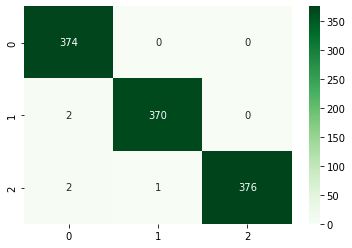

In [62]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, Y_train)
predict_rf = rf.predict(testVector)
metrics(predict_rf)



*Applying LSTM*

Long Short Term Memory(LSTM) Networks are a special kind of the Recurrent Neural Networks(RNN) capable of learning long-term dependencies. LSTM can be very useful in text mining problems as it involves dependencies in the sentences which can be caught in the "memory" of the LSTM. Here, we will train a simple LSTM and LSTM with Word2Vec embedding for classifying the reviews into positive and negative sentiments using Keras library.

*Simple LSTM*

We need to preprocess the text data to 2D tensor before we begin fitting it into a simple LSTM. Firstly we will tokenize the corpus by considering only top words (top_words = 20000) and transforming reviews to numerical sequences using the trained tokenizer. Lastly we will make it sure that all the numerical sequences have the same length (maxlen=100) for modelling by truncating the long reviews and padding shorter reviews having zero values.

For constructing a simple LSTM, we will use embedding class in Keras to building up the first layer. This embedding layer converts numerical sequence of words into a word embedding. We should also note that the embedding class provides a convenient way to map discrete words into a continuous vector space but it doesn't take the semantic similarity of the words into account. The next layer is the LSTM layer with 128 memory units. Finally, we will use a dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 prediction for the two classes (positive sentiment and negative sentiment). As it is a binary classification problem log loss is used as the loss function(binary_crossentropy in Keras). ADAM optimization algorithm will be used.

Here's the workflow in this part: -


* Prepare X_train and X_test to 2D tensor.
* Train a simple LSTM (embedding layer => LSTM layer => dense layer).
* Compile and fit the model using log loss function and ADAM optimizer.








  
    
    



In [63]:
data2 = data 

In [65]:
data2['sentiment'].value_counts()

Positive    3749
Neutral     3749
Negative    3749
Name: sentiment, dtype: int64

In [66]:
data2['sentiment'] = data2['sentiment'].replace({'Negative':0,'Positive':1,'Neutral':2})

In [67]:
data2['sentiment'].value_counts()

1    3749
2    3749
0    3749
Name: sentiment, dtype: int64

In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Preprocessed_Reviews  11247 non-null  object
 1   sentiment             11247 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 175.9+ KB


In [69]:
X_train,X_test,y_train,y_test = train_test_split(data2['Preprocessed_Reviews'],data2['sentiment'],test_size=0.1)

In [70]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10122,) (1125,) (10122,) (1125,)


In [74]:
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers.core import Dense, Dropout, Activation, Lambda
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.callbacks import EarlyStopping

In [75]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) 
print('X_test shape:', X_test_seq.shape) 
print('y_train shape:', y_train_seq.shape) 
print('y_test shape:', y_test_seq.shape)

X_train shape: (10122, 100)
X_test shape: (1125, 100)
y_train shape: (10122, 3)
y_test shape: (1125, 3)


In [80]:
# Constructing a Simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(Dropout(0.2))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print("Test loss: ",score[0])
print('Test accuracy: ',score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
317/317 [=========================

In [89]:
# Getting weight matrix of the embedding layer
model1.layers[0].get_weights()[0] # weight matrix of the embedding layer, word-by-dim matrix
print(model1.layers[0].get_weights()[0].shape)

(20000, 128)




*LSTM with Word2Vec Embedding*

In the simple LSTM model constructed above, the embedding class in Keras comes in handy for converting the numerical sequence of words into a word embedding but it doesn't take the semantic similarity of the words into account. The model assigns random weights to the embedding layer and learn the embeddings by minimizing the global error of the network.

Instead of using random weights we will use pretrained word embeddings for initializing the weight of an embedding layer. Here, we will use the Word2Vec embedding trained in Part 4 for intializing the weights of embedding layer in LSTM.


1.   Load pretrained word embedding model.
2.   Construct embedding layer using embedding matrix as weights.
3.   Train a LSTM with Word2Vec embedding (embedding layer => LSTM layer => dense layer).
4.   Compile and fit the model using log loss function and ADAM optimizer.







    
    
    
    



In [90]:
# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")


# Getting Word2Vec embedding matrix
embedding_matrix = w2v.wv.syn0  # embedding matrix, type = numpy.ndarray 
print("Shape of embedding matrix : ", embedding_matrix.shape)

Shape of embedding matrix :  (1235, 300)


In [91]:
top_words = embedding_matrix.shape[0] #4016
maxlen = 100 
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorizing X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

X_train shape: (10122, 100)
X_test shape: (1125, 100)
y_train shape: (10122, 3)
y_test shape: (1125, 3)


In [92]:


# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], #4016
                            embedding_matrix.shape[1], #300
                            weights=[embedding_matrix])


# Constructing LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compiling model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)


# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 300)         370500    
                                                                 
 lstm_3 (LSTM)               (None, 128)               219648    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 590,535
Trainable params: 590,535
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
317/317 [==============================] - 145s 440ms/step - loss: 0.2091 - accuracy: 0.8612
Epoch 2/3
317/317 [==============================] - 137s 433ms/step - loss: 



*Optional Tasks: Topic Modelling*

Latent Dirichlet Allocation(LDA)


In [94]:
doc_complete = data2["Preprocessed_Reviews"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

In [95]:
import gensim
from gensim import corpora

In [96]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(3415 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...)


In [97]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1)],
 [(6, 1),
  (26, 2),
  (34, 1),
  (35, 4),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(35, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 

In [98]:
from gensim.models import LdaModel

In [99]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [100]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.028*"use" + 0.028*"work" + 0.026*"buy" + 0.023*"week" + 0.018*"junk" + 0.017*"turn" + 0.016*"try" + 0.015*"last" + 0.015*"long" + 0.014*"back"')

(1, '0.024*"use" + 0.024*"good" + 0.020*"amazon" + 0.019*"generation" + 0.019*"th" + 0.019*"much" + 0.017*"youtube" + 0.017*"video" + 0.017*"echo" + 0.015*"would"')

(2, '0.035*"read" + 0.025*"book" + 0.025*"device" + 0.019*"light" + 0.016*"kindle" + 0.014*"would" + 0.013*"buy" + 0.013*"good" + 0.012*"purchase" + 0.012*"fire"')

(3, '0.031*"like" + 0.029*"apps" + 0.022*"return" + 0.022*"lot" + 0.017*"slow" + 0.017*"find" + 0.014*"game" + 0.014*"screen" + 0.013*"nothing" + 0.013*"kid"')

(4, '0.043*"use" + 0.026*"good" + 0.026*"great" + 0.024*"echo" + 0.022*"screen" + 0.019*"sound" + 0.017*"easy" + 0.015*"love" + 0.015*"like" + 0.015*"thing"')

(5, '0.048*"buy" + 0.031*"one" + 0.029*"kindle" + 0.028*"year" + 0.024*"charge" + 0.021*"get" + 0.020*"model" + 0.019*"go" + 0.017*"last" + 0.016*"replace"')

(6, '0.074*"tablet" + 0.043*"good" +

In [101]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [102]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,use,use,read,like,use,buy,tablet,echo,amazon
1,work,good,book,apps,good,one,good,alexa,one
2,buy,amazon,device,return,great,kindle,kid,show,get
3,week,generation,light,lot,echo,year,price,work,device
4,junk,th,kindle,slow,screen,charge,apps,get,register
5,turn,much,would,find,sound,get,game,first,code
6,try,youtube,buy,game,easy,model,buy,useless,tablet
7,last,video,good,screen,love,go,amazon,make,software
8,long,echo,purchase,nothing,like,last,play,update,like
9,back,would,fire,kid,thing,replace,work,sure,easy


In [103]:
ldamodel.show_topic(0, topn = 20)

[('use', 0.028106203),
 ('work', 0.027848706),
 ('buy', 0.025598476),
 ('week', 0.022567693),
 ('junk', 0.017699609),
 ('turn', 0.016971692),
 ('try', 0.015664443),
 ('last', 0.015461913),
 ('long', 0.015151899),
 ('back', 0.014390383),
 ('would', 0.01158516),
 ('phone', 0.0115663875),
 ('go', 0.01137696),
 ('since', 0.010680993),
 ('get', 0.01067237),
 ('apps', 0.010472597),
 ('kindle', 0.0103090545),
 ('fire', 0.009739046),
 ('store', 0.009438848),
 ('time', 0.009307361)]

In [104]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=086e7efc19bc08031bed2f01d4460971aad5d5fb157bddb3eea841247b8dc4fe
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=cc1679a1f5138e82b0e7a314902b0c9291c916ce15ea8f8e5fa33ec41f4fac26
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [107]:
import pyLDAvis
from pyLDAvis import gensim_models as gensim



*Displaying Results & Getting Insights*


In [109]:
Lda_display = gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)

*Creating a Wordcloud*

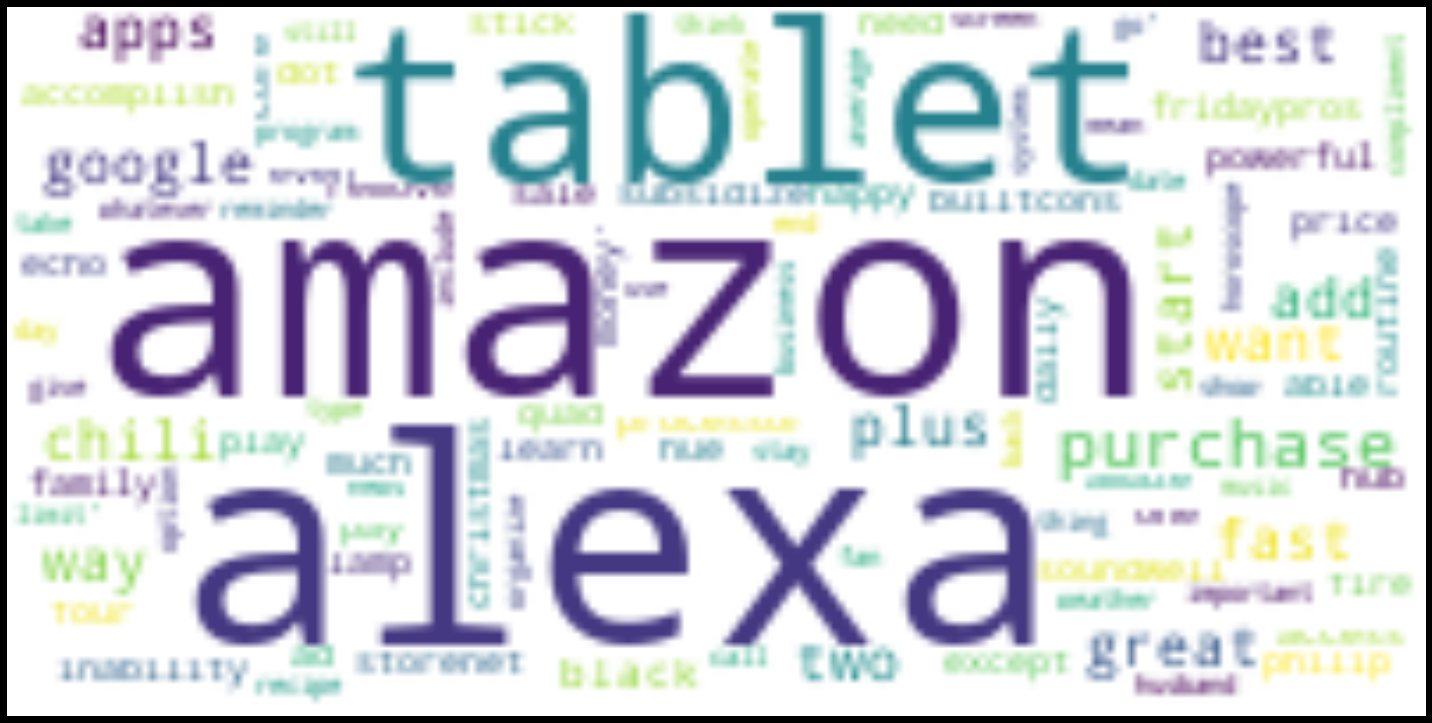

In [111]:
from wordcloud import WordCloud, STOPWORDS
txt = data2["Preprocessed_Reviews"].values
wc = WordCloud(width=200, height=100, background_color="white", stopwords=STOPWORDS).generate(str(txt))
fig = plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()